In [1]:
# Let's import scikit-learn dataset module
from sklearn import datasets

In [2]:
dataset = datasets.load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

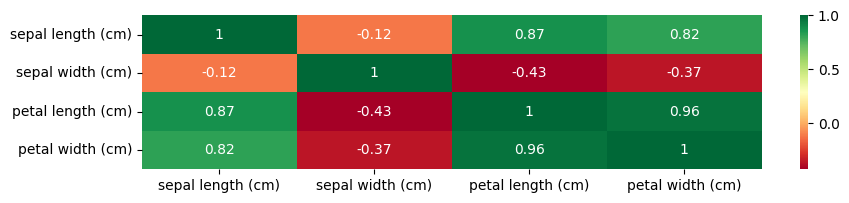

In [3]:
# Correlation heatmap for the variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = pd.DataFrame(dataset.data, columns=dataset.feature_names)
correlation_matrix = data_corr.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(10, 2))  # figsize=(length x height)
g = sns.heatmap(data_corr[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()


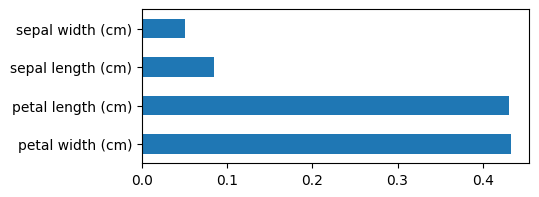

In [4]:
# Train ExtraTreeClassifier model
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)

# Review feature importance on the trained model
feat_importances = pd.Series(model.feature_importances_, index=dataset.feature_names)
feat_importances.nlargest(4).plot(figsize=(5,2), kind='barh')
plt.show()

In [5]:
# Apply normalization to Scale the data
print("Before:")
print("Min, Max of data: %s, %s" % (dataset.data.min(), dataset.data.max()))
print("Min, Max of target: %s, %s" % (dataset.target.min(), dataset.target.max()))

for i in range(0, 4):
    dataset.data[:, i] = (dataset.data[:, i] - dataset.data[:, i].min()) / \
                         (dataset.data[:, i].max() - dataset.data[:, i].min())

dataset.target = (dataset.target - dataset.target.min()) / \
                 (dataset.target.max() - dataset.target.min())

print("After:")
print("Min, Max of data: %s, %s" % (dataset.data.min(), dataset.data.max()))
print("Min, Max of target: %s, %s" % (dataset.target.min(), dataset.target.max()))


Before:
Min, Max of data: 0.1, 7.9
Min, Max of target: 0, 2
After:
Min, Max of data: 0.0, 1.0
Min, Max of target: 0.0, 1.0


Vibe Coding
“Normalize Your Fitness Data”
You're building a Health Dashboard App that reads user data like daily steps, calories burned, hours of sleep, and heart rate. Before feeding this data into a machine learning model to predict fitness level, you need to normalize it.

💡 Your Task:
Write a Python program to:

Accept or define a NumPy array representing fitness data.

Normalize each feature (column) using min-max scaling.

Display the min and max values before and after normalization.

Bonus: Add a function to normalize any given dataset (2D array) and reuse it.

🎯 Goal: Practice scaling real-world-like data and modularizing your code!

In [6]:
import numpy as np

# Sample fitness data: [steps, calories, sleep hours, heart rate]
# Each row is a day
fitness_data = np.array([
    [7000, 300, 6, 70],
    [10000, 500, 7.5, 65],
    [5000, 250, 5, 80],
    [12000, 600, 8, 60],
    [8000, 400, 7, 72]
])

print("Before Normalization:")
print("Min values:", fitness_data.min(axis=0))
print("Max values:", fitness_data.max(axis=0))

# Function to normalize data using min-max scaling
def normalize_min_max(data):
    return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Normalize the fitness data
normalized_data = normalize_min_max(fitness_data)

print("\nAfter Normalization:")
print("Min values:", normalized_data.min(axis=0))
print("Max values:", normalized_data.max(axis=0))
print("\nNormalized Fitness Data:\n", normalized_data)


Before Normalization:
Min values: [5000.  250.    5.   60.]
Max values: [1.2e+04 6.0e+02 8.0e+00 8.0e+01]

After Normalization:
Min values: [0. 0. 0. 0.]
Max values: [1. 1. 1. 1.]

Normalized Fitness Data:
 [[0.28571429 0.14285714 0.33333333 0.5       ]
 [0.71428571 0.71428571 0.83333333 0.25      ]
 [0.         0.         0.         1.        ]
 [1.         1.         1.         0.        ]
 [0.42857143 0.42857143 0.66666667 0.6       ]]
